# Zadanie "Wyznaczenie prądów"

Naszym zadaniem było przeanalizowanie podanego przez prowadzącego układu elektrycznego składającego się z źródła prądowego i 5 rezystrów. Schemat elektryczny jest widoczny poniżej.
Znając wartości rezystancji oraz ograniczenia prądowe rezystorów mieliśmy wyznaczyć maksymalną wartość prądu źródła, która nie uszkodzi rezystorów. 
Do rozwiązywania tego problemu wykorzystaliśmy metodę programowania liniowego w celu maksymalizacji zmiennej "Prąd" dla każego z rezystorów.

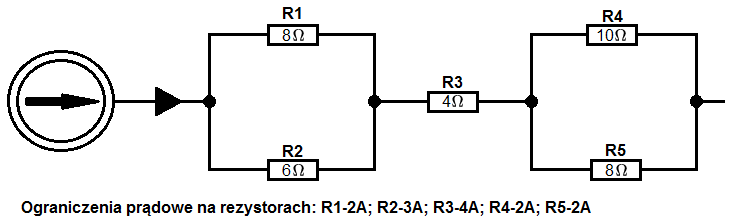


In [5]:
# Rozwiązanie problemu.

# Import bibliotek używanych do rozwiązania problemu.
from pulp import *
import pandas as pd

# Tworzenie problemu i jego maksymalizacja.
prob = LpProblem("Maksymalny prąd",LpMaximize)

# Zmienna decyzyjna.
zrodlo = LpVariable("Prąd_źródła",0)

# Pomocnicze zmienne rezystorów.
rez = {}
for i in range(1,6):
    rez[f"R{i}"]=LpVariable(f"Prąd_R{i}",0)

# Obliczanie prądów na poszczególnych rezystorach.
# Wykorzytaliśmy wzory wyznaczone na podstawie praw elektrotechniki .
prob += rez["R1"] + rez["R2"]
prob += zrodlo * 6/14 == rez["R1"], "Prąd_R1"
prob += zrodlo * 8/14 == rez["R2"], "Prąd_R2"
prob += rez["R1"] + rez["R2"] == rez["R3"], "Prąd_R3"
prob += rez["R3"] * 8/18 == rez["R4"], "Prąd_R4"
prob += rez["R3"] * 10/18 == rez["R5"], "Prąd_R5"

# Ograniczenia maksymalnego prądu na rezystorach.
ogr = [2,3,4,2,2] # Ograniczenie kolejnych rezystorów.
for i in range(len(ogr)):
    prob += rez[f"R{i+1}"] <= ogr[i]
    
# Rozwiązywanie problemu.
prob.solve()
# Zwraca status rozwiązania.
print("Status:", LpStatus[prob.status])

# Wypisanie maksymalnych prądów, które przepuszczają rezystory.
for v in prob.variables():
    print(v.name, "=", v.varValue,"A")
print("\nNajwiększy bezpieczny prąd zasilania źródła: {} A".format(value(prob.objective)))


Status: Optimal
Prąd_R1 = 1.5428571 A
Prąd_R2 = 2.0571429 A
Prąd_R3 = 3.6 A
Prąd_R4 = 1.6 A
Prąd_R5 = 2.0 A
Prąd_źródła = 3.6 A

Największy bezpieczny prąd zasilania źródła: 3.6 A
